## This notebook will be used to explore and analyze data for my Coursera Data Science Capstone Project!!

In [55]:
##importing relevant libraries for project

import pandas as pd
import numpy as np

print ("Libraries Installed Successfully")

Libraries Installed Successfully


In [56]:
##Print hello Capstone Course

print ("Hello Capstone Project Course!")

Hello Capstone Project Course!


## Problem Statement:
I have always desired to open a NY Deli and Sandwich shop, as I grew up waitressing in one. I loved the people and the atmosphere. North Carolina is overrun with chain deli shops like Jimmy Johns, Jersey Mike’s, etc. so I would like to find a location close to family where a small business would thrive without excess competition. 
I am from Greensboro, NC and have the option of opening this shop in Charlotte (where I currently live) or Greensboro NC. 

Since this decision would require a substantial financial input on my part I need to determine which city and neighborhood within the city selected has reasonable rent costs.  Once I select a city, I want to understand which areas of the city have the most Deli/Sandwich shops so that I can select an area that doesn't have an oversaturated market.

Even though this is a pipe dream of mine, anyone who is interested in opening a restaurant would benefit in leveraging Data Science to make an educated decision before selecting a location to open any restaurant or venue.



In [57]:
##minimal packages to install
import numpy as np # library for vectorized computation
import pandas as pd # library to process data as dataframes
import scipy as sp


##import matplotlib libraries
!pip install matplotlib
import matplotlib.pyplot as plt


##importing packages for clustering
!pip install -U scikit-learn
from sklearn.cluster import KMeans 


##install maps for folium
!pip install folium
import folium

##install requests library
!pip install requests
import requests

!pip install beautifulsoup4
from bs4 import BeautifulSoup
import urllib.request

print("Install Successfully!!")

tensorflow 1.3.0 requires tensorflow-tensorboard<0.2.0,>=0.1.0, which is not installed.
Requirement already up-to-date: scikit-learn in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (0.21.2)
Requirement not upgraded as not directly required: joblib>=0.11 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from scikit-learn) (0.13.2)
Requirement not upgraded as not directly required: numpy>=1.11.0 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from scikit-learn) (1.13.3)
Requirement not upgraded as not directly required: scipy>=0.17.0 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from scikit-learn) (1.0.0)
tensorflow 1.3.0 requires tensorflow-tensorboard<0.2.0,>=0.1.0, which is not installed.
tensorflow 1.3.0 requires tensorflow-tensorboard<0.2.0,>=0.1.0, which is not installed.
tensorflow 1.3.0 requires tensorflow-tensorboard<0.2.0,>=0.1.0, which is not installed.
tensorflow 1.3.0 requires tensorflow-tensorboard<0.2.0,>=0.1.0, which is n

In [58]:
# The code was removed by Watson Studio for sharing.

,Zip,City,State,Latitude,Longitude,Timezone,Daylight savings time flag,lat,long
0,29659,Lowndesville,SC,34.210243,-82.632390,-5,1,34.210243,-82.632390
1,33837,Davenport,FL,28.223014,-81.631310,-5,1,28.223014,-81.631310
2,80912,Colorado Springs,CO,38.824690,-104.562027,-7,1,38.824690,-104.562027
3,81040,Gardner,CO,37.777997,-105.200720,-7,1,37.777997,-105.200720
4,83715,Boise,ID,43.459855,-116.243984,-7,1,43.459855,-116.243984


# First I wanted to research the most expensive cities/neighborhoods to rule out any areas of Charlotte or Greensboro that I could not afford rent for a commercial space.



In [59]:

body = client_c1c0ef3ce5ed43efb74fe41e235b8f70.get_object(Bucket='laurencrowedatasciencecaptsonepro-donotdelete-pr-ipxf2ytff5rbhi',Key='Most_Exp_Rent_NC.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

nc_rent = pd.read_csv(body)

nc_rent = nc_rent.sort_values(by='Avg Rent', ascending=False)


##top 20 highest rent
nc_rent = nc_rent.head(20)

nc_rent



,Zip Code,City,County,Avg Rent
0,28202,Charlotte,Mecklenburg County,1608
1,28203,Charlotte,Mecklenburg County,1458
2,28204,Charlotte,Mecklenburg County,1420
3,27516,Chapel Hill,Orange County,1411
4,27605,Raleigh,Wake County,1380
5,27403,Greensboro,Guilford County,1345
6,27603,Raleigh,Wake County,1336
7,27607,Raleigh,Wake County,1311
8,28211,Charlotte,Mecklenburg County,1292
9,27601,Raleigh,Wake County,1267


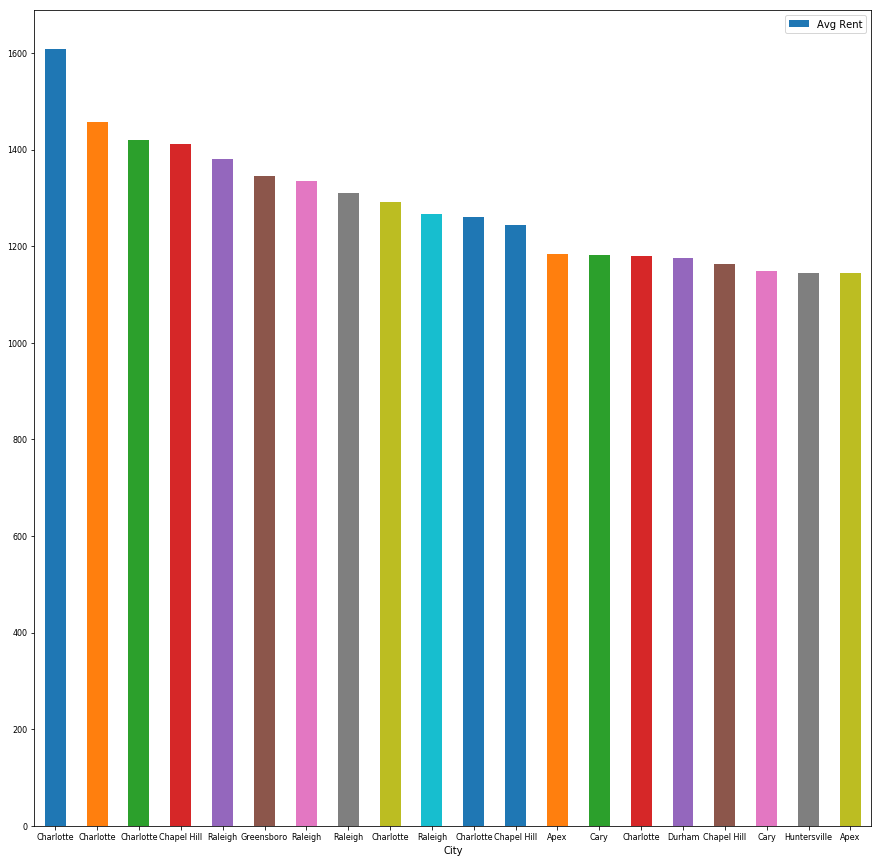

In [60]:
##visualize top 20 zip codes for rent in NC by City

ax = nc_rent.plot.bar(x='City', y='Avg Rent', rot=0, figsize=(15, 15),fontsize = 8)


Findings: 7 of top 20 highest rent zip codes are in Charlotte or surrounding area
1 of the top 20 in Greensboro.

Conclusion from this analysis: Greensboro is likely a better fit as I am starting a new business and need to pick a location that has reasonable rent space costs.
I will avoid the 27403 area in Greensboro in my area search because of the high rent costs. I assume if residential costs are high in the area so is commercial.


In [61]:
##Zip Dataframe of Greensboro
gso_zip = zip_df[zip_df['City'] == 'Greensboro'] ##filter for Grensboro
gso_zip = gso_zip[gso_zip['State'] == 'NC'] #filter for NC
gso_zip

,Zip,City,State,Latitude,Longitude,Timezone,Daylight savings time flag,lat,long
6632,27407,Greensboro,NC,36.025379,-79.871120,-5,1,36.025379,-79.871120
6729,27438,Greensboro,NC,36.080707,-80.024400,-5,1,36.080707,-80.024400
7078,27403,Greensboro,NC,36.064485,-79.822060,-5,1,36.064485,-79.822060
7079,27425,Greensboro,NC,36.080707,-80.024400,-5,1,36.080707,-80.024400
8311,27409,Greensboro,NC,36.083885,-79.941220,-5,1,36.083885,-79.941220
11030,27455,Greensboro,NC,36.156707,-79.806440,-5,1,36.156707,-79.806440
11781,27419,Greensboro,NC,36.080707,-80.024400,-5,1,36.080707,-80.024400
12188,27427,Greensboro,NC,36.080707,-80.024400,-5,1,36.080707,-80.024400
14165,27401,Greensboro,NC,36.071135,-79.774680,-5,1,36.071135,-79.774680
16108,27495,Greensboro,NC,36.080707,-80.024400,-5,1,36.080707,-80.024400


In [62]:
###Create Folium map of Greensboro Zip Codes now that I have decided Greensboro is the better choice based on analysis above.



map_gso= folium.Map(location=[36.0726, -79.7920], zoom_start=10)

# add markers to map
for lat, lng, Zip, City in zip(gso_zip['Latitude'], gso_zip['Longitude'], gso_zip['Zip'], gso_zip['City']):
    label = '{}, {}'.format(Zip, City)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_gso)  
    
map_gso

    For the next phase of the analysis I plan to find all the most common venue types in the Greensboro zip codes. I want to select an area that has a commercial presence but is not over saturated with restaurants and Deli's/Sandwich shops especially.

In [63]:
##define foursquare credentials

#Define four square credentials
CLIENT_ID = 'NZCDV121VZJ0VGBIFODVV4WA4GJ5JUSDOBZOQZ4RX0OGFBWK' # your Foursquare ID
CLIENT_SECRET = 'IBLGQL5QHJYM5EFJVIW1VPNKYTGJVYOO4FVIYSF5MZCCZZE1' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
radius = 5000
LIMIT = 5000

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: NZCDV121VZJ0VGBIFODVV4WA4GJ5JUSDOBZOQZ4RX0OGFBWK
CLIENT_SECRET:IBLGQL5QHJYM5EFJVIW1VPNKYTGJVYOO4FVIYSF5MZCCZZE1


In [64]:
##call foursquare to search all venues surrounding the greensboro area

import json, requests
url = 'https://api.foursquare.com/v2/venues/explore'

params = dict(
  client_id= 'NZCDV121VZJ0VGBIFODVV4WA4GJ5JUSDOBZOQZ4RX0OGFBWK',
  client_secret= 'IBLGQL5QHJYM5EFJVIW1VPNKYTGJVYOO4FVIYSF5MZCCZZE1',
  v='20180323',
  ll='36.0726,-79.7920',
  ##query='restaurant',
  limit= 1000,
  radius = 10000
)
resp = requests.get(url=url, params=params)
data = json.loads(resp.text)
data

{'meta': {'code': 200, 'requestId': '5d266315deb49500258e44b1'},
 'response': {'groups': [{'items': [{'reasons': {'count': 0,
       'items': [{'reasonName': 'globalInteractionReason',
         'summary': 'This spot is popular',
         'type': 'general'}]},
      'referralId': 'e-0-4b43dc8bf964a5206bec25e3-0',
      'venue': {'beenHere': {'count': 0,
        'lastCheckinExpiredAt': 0,
        'marked': False,
        'unconfirmedCount': 0},
       'categories': [{'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/bakery_',
          'suffix': '.png'},
         'id': '4bf58dd8d48988d16a941735',
         'name': 'Bakery',
         'pluralName': 'Bakeries',
         'primary': True,
         'shortName': 'Bakery'}],
       'contact': {},
       'hereNow': {'count': 0, 'groups': [], 'summary': 'Nobody here'},
       'id': '4b43dc8bf964a5206bec25e3',
       'location': {'address': '315 S Elm St',
        'cc': 'US',
        'city': 'Greensboro',
        'country': 'United Sta

In [65]:
import json # library to handle JSON files
from pandas.io.json import json_normalize

In [66]:
## function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [67]:
##clean json and structure into pandas dataframe

venues = data['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Cheesecakes by Alex,Bakery,36.069561,-79.790452
1,LeBauer Park,Park,36.074436,-79.788320
2,Crafted,Taco Place,36.070937,-79.790079
3,NewBridge Bank Park,Baseball Stadium,36.076141,-79.795327
4,Joymongers Brewing Co.,Brewery,36.078512,-79.793225


In [68]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

100 venues were returned by Foursquare.


In [69]:
##create a function to repeat this process for all zip codes in Greensboro

def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Zip_Code', 
                  'Zip_Latitude', 
                  'Zip_Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [70]:
gso_venues = getNearbyVenues(names=gso_zip['Zip'],
                                   latitudes=gso_zip['lat'],
                                   longitudes=gso_zip['long']
                                  )
print(gso_venues.shape)
gso_venues.head()

27407
27438
27403
27425
27409
27455
27419
27427
27401
27495
27420
27406
27415
27413
27405
27408
27410
27417
27498
27402
27416
27404
27480
27412
27411
27429
27499
27435
(173, 7)


,Zip_Code,Zip_Latitude,Zip_Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,27407,36.025379,-79.87112,I love pho,36.028913,-79.868782,Vietnamese Restaurant
1,27407,36.025379,-79.87112,Lee's Barber Shop,36.028890,-79.868870,Cosmetics Shop
2,27407,36.025379,-79.87112,Enterprise Rent-A-Car,36.028526,-79.869993,Rental Car Location
3,27407,36.025379,-79.87112,Pizza Hut,36.028235,-79.868923,Pizza Place
4,27407,36.025379,-79.87112,McDonald's,36.026269,-79.875415,Fast Food Restaurant


In [71]:
##check how many venues returned for each Greensboro Zip
gso_venues.groupby('Zip_Code').count()

,Zip_Latitude,Zip_Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Zip_Code,,,,,,
27401,4,4,4,4,4,4
27402,4,4,4,4,4,4
27403,26,26,26,26,26,26
27404,3,3,3,3,3,3
27405,16,16,16,16,16,16
27406,1,1,1,1,1,1
27407,8,8,8,8,8,8
27408,7,7,7,7,7,7
27409,2,2,2,2,2,2


In [72]:
##determine unique categories for all returned venues
print('There are {} uniques categories.'.format(len(gso_venues['Venue Category'].unique())))

#List unique values in the df['name'] column
gso_venues['Venue Category'].unique()


There are 81 uniques categories.


array(['Vietnamese Restaurant', 'Cosmetics Shop', 'Rental Car Location',
       'Pizza Place', 'Fast Food Restaurant', 'Hot Dog Joint',
       'Shoe Store', 'Food & Drink Shop', 'IT Services', 'Jewelry Store',
       'Trail', 'Bar', 'Hookah Bar', 'Wine Shop', 'Restaurant',
       'Deli / Bodega', 'Pool Hall', 'Bakery', 'Brewery', 'Rock Club',
       'Gas Station', 'Whisky Bar', 'Sports Bar', 'Mexican Restaurant',
       'Pharmacy', 'Diner', 'Music Store', 'Convenience Store',
       'Salon / Barbershop', 'Juice Bar', 'Automotive Shop',
       'Hardware Store', 'Chinese Restaurant', 'Discount Store',
       'Grocery Store', 'New American Restaurant', 'Sandwich Place',
       'Mobile Phone Shop', 'Video Store', 'Fried Chicken Joint',
       "Women's Store", 'Clothing Store', 'Furniture / Home Store',
       'Auto Workshop', 'Big Box Store', 'American Restaurant',
       'Gift Shop', 'Asian Restaurant', 'Gym', 'Department Store',
       'Bagel Shop', 'Tex-Mex Restaurant', 'Wings Joint',
 

In [73]:
##filter out Jewlery Store, Gas Station, Etc. as they are not relevant for my analysis

gso_venues = gso_venues[~gso_venues['Venue Category'].isin(['Jewelry Store', 'Gas Station', 'Trail', "Women's Store", 'Discount Store', 'Hardware Store'])]
gso_venues

,Zip_Code,Zip_Latitude,Zip_Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,27407,36.025379,-79.871120,I love pho,36.028913,-79.868782,Vietnamese Restaurant
1,27407,36.025379,-79.871120,Lee's Barber Shop,36.028890,-79.868870,Cosmetics Shop
2,27407,36.025379,-79.871120,Enterprise Rent-A-Car,36.028526,-79.869993,Rental Car Location
3,27407,36.025379,-79.871120,Pizza Hut,36.028235,-79.868923,Pizza Place
4,27407,36.025379,-79.871120,McDonald's,36.026269,-79.875415,Fast Food Restaurant
5,27407,36.025379,-79.871120,Dollar dog mobile eatery,36.028105,-79.870254,Hot Dog Joint
6,27407,36.025379,-79.871120,Shine Unlimited,36.025020,-79.875149,Shoe Store
7,27407,36.025379,-79.871120,Edible Arrangements,36.028394,-79.868903,Food & Drink Shop
8,27438,36.080707,-80.024400,C-Bar Symbologies,36.081309,-80.023963,IT Services
11,27403,36.064485,-79.822060,Jake's Billiards,36.063937,-79.820244,Bar


Now that I have all the returned venues for each zip code I will be analyzing to narrow my search for an area of Greensboro to locate my Deli and Sandwich Shop.

In [74]:
# one hot encoding
gso_onehot = pd.get_dummies(gso_venues[['Venue Category']], prefix="", prefix_sep="")


##convert zip code in gso Venues to string
gso_venues['Zip_Code']= gso_venues['Zip_Code'].astype(str)

##add Zip_Code column back to dataframe
gso_onehot['Zip_Code'] = gso_venues['Zip_Code'] 

##move Zip_Code column to the first column
fixed_columns = [gso_onehot.columns[-1]] + list(gso_onehot.columns[:-1])
gso_onehot = gso_onehot[fixed_columns]
gso_onehot.head()

,Zip_Code,American Restaurant,Art Gallery,Asian Restaurant,Auto Workshop,Automotive Shop,Bagel Shop,Bakery,Bar,Beer Garden,...,Storage Facility,Sushi Restaurant,Taco Place,Tex-Mex Restaurant,Vegetarian / Vegan Restaurant,Video Store,Vietnamese Restaurant,Whisky Bar,Wine Shop,Wings Joint
0,27407,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,27407,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,27407,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,27407,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,27407,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [75]:
##group rows by zip and take mean frequency of occurence of each category
gso_grouped = gso_onehot.groupby('Zip_Code').mean().reset_index()
gso_grouped

,Zip_Code,American Restaurant,Art Gallery,Asian Restaurant,Auto Workshop,Automotive Shop,Bagel Shop,Bakery,Bar,Beer Garden,...,Storage Facility,Sushi Restaurant,Taco Place,Tex-Mex Restaurant,Vegetarian / Vegan Restaurant,Video Store,Vietnamese Restaurant,Whisky Bar,Wine Shop,Wings Joint
0,27401,0.000000,0.00000,0.000000,0.000000,0.0,0.0000,0.000000,0.000000,0.00000,...,0.00000,0.00000,0.00000,0.0000,0.00000,0.000000,0.000,0.000000,0.000000,0.00000
1,27402,0.000000,0.00000,0.000000,0.000000,0.0,0.0000,0.000000,0.000000,0.00000,...,0.00000,0.00000,0.00000,0.0000,0.00000,0.000000,0.000,0.000000,0.000000,0.00000
2,27403,0.000000,0.00000,0.000000,0.000000,0.0,0.0000,0.041667,0.083333,0.00000,...,0.00000,0.00000,0.00000,0.0000,0.00000,0.000000,0.000,0.041667,0.041667,0.00000
3,27404,0.000000,0.00000,0.000000,0.000000,0.0,0.0000,0.000000,0.000000,0.00000,...,0.00000,0.00000,0.00000,0.0000,0.00000,0.000000,0.000,0.000000,0.000000,0.00000
4,27405,0.000000,0.00000,0.000000,0.066667,0.0,0.0000,0.000000,0.000000,0.00000,...,0.00000,0.00000,0.00000,0.0000,0.00000,0.066667,0.000,0.000000,0.000000,0.00000
5,27406,0.000000,0.00000,0.000000,0.000000,0.0,0.0000,0.000000,0.000000,0.00000,...,0.00000,0.00000,0.00000,0.0000,0.00000,0.000000,0.000,0.000000,0.000000,0.00000
6,27407,0.000000,0.00000,0.000000,0.000000,0.0,0.0000,0.000000,0.000000,0.00000,...,0.00000,0.00000,0.00000,0.0000,0.00000,0.000000,0.125,0.000000,0.000000,0.00000
7,27408,0.166667,0.00000,0.166667,0.000000,0.0,0.0000,0.000000,0.166667,0.00000,...,0.00000,0.00000,0.00000,0.0000,0.00000,0.000000,0.000,0.000000,0.000000,0.00000
8,27409,0.000000,0.00000,0.000000,0.000000,1.0,0.0000,0.000000,0.000000,0.00000,...,0.00000,0.00000,0.00000,0.0000,0.00000,0.000000,0.000,0.000000,0.000000,0.00000
9,27410,0.000000,0.00000,0.062500,0.000000,0.0,0.0625,0.062500,0.000000,0.00000,...,0.00000,0.00000,0.00000,0.0625,0.00000,0.000000,0.000,0.000000,0.000000,0.06250


In [76]:
gso_grouped2 = gso_grouped[['Zip_Code','Deli / Bodega','Sandwich Place']]
gso_grouped2

,Zip_Code,Deli / Bodega,Sandwich Place
0,27401,0.250000,0.000000
1,27402,0.000000,0.000000
2,27403,0.041667,0.000000
3,27404,0.000000,0.000000
4,27405,0.000000,0.066667
5,27406,0.000000,0.000000
6,27407,0.000000,0.000000
7,27408,0.000000,0.000000
8,27409,0.000000,0.000000
9,27410,0.000000,0.062500


In [77]:
num_top_venues = 10

for Zip in gso_grouped['Zip_Code']:
    print("----"+Zip+"----")
    temp = gso_grouped[gso_grouped['Zip_Code'] == Zip].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----27401----
                 venue  freq
0    Convenience Store  0.25
1           Restaurant  0.25
2        Deli / Bodega  0.25
3   Chinese Restaurant  0.25
4            Rock Club  0.00
5  Rental Car Location  0.00
6            Pool Hall  0.00
7                 Pool  0.00
8          Pizza Place  0.00
9             Pharmacy  0.00


----27402----
                           venue  freq
0                  Moving Target  0.25
1           Gym / Fitness Center  0.25
2                           Pool  0.25
3                           Lake  0.25
4        New American Restaurant  0.00
5            Rental Car Location  0.00
6                      Pool Hall  0.00
7                    Pizza Place  0.00
8                       Pharmacy  0.00
9  Paper / Office Supplies Store  0.00


----27403----
                venue  freq
0                 Bar  0.08
1         Pizza Place  0.08
2             Brewery  0.08
3   Convenience Store  0.04
4          Sports Bar  0.04
5               Diner  0.04
6  Salon /

In [78]:
##put into pandas df & sort venues in descending order

##fctn to sort
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

##create df with top 10 venues for Harbourfront neighborhoods
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Zip_Code']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
gso_venues_sorted = pd.DataFrame(columns=columns)
gso_venues_sorted['Zip_Code'] = gso_grouped['Zip_Code']

for ind in np.arange(gso_grouped.shape[0]):
    gso_venues_sorted.iloc[ind, 1:] = return_most_common_venues(gso_grouped.iloc[ind, :], num_top_venues)

gso_venues_sorted

,Zip_Code,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,27401,Restaurant,Chinese Restaurant,Convenience Store,Deli / Bodega,Doctor's Office,College Library,Cosmetics Shop,Department Store,Diner,Fast Food Restaurant
1,27402,Gym / Fitness Center,Moving Target,Pool,Lake,College Library,Convenience Store,Cosmetics Shop,Deli / Bodega,Department Store,Diner
2,27403,Brewery,Pizza Place,Bar,Deli / Bodega,Mexican Restaurant,Pharmacy,Pool Hall,Juice Bar,Restaurant,Rock Club
3,27404,IT Services,Wings Joint,Fast Food Restaurant,College Library,Convenience Store,Cosmetics Shop,Deli / Bodega,Department Store,Diner,Doctor's Office
4,27405,Mobile Phone Shop,Chinese Restaurant,Pizza Place,Clothing Store,New American Restaurant,Cosmetics Shop,Sandwich Place,Shoe Store,Big Box Store,Fast Food Restaurant
5,27406,Fast Food Restaurant,Coffee Shop,College Library,Convenience Store,Cosmetics Shop,Deli / Bodega,Department Store,Diner,Doctor's Office,Wings Joint
6,27407,Hot Dog Joint,Food & Drink Shop,Pizza Place,Shoe Store,Cosmetics Shop,Fast Food Restaurant,Rental Car Location,Vietnamese Restaurant,Food Court,Fried Chicken Joint
7,27408,American Restaurant,Gym,Asian Restaurant,Gift Shop,Furniture / Home Store,Bar,Doctor's Office,Convenience Store,Cosmetics Shop,Deli / Bodega
8,27409,Automotive Shop,Wings Joint,Fast Food Restaurant,College Library,Convenience Store,Cosmetics Shop,Deli / Bodega,Department Store,Diner,Doctor's Office
9,27410,Wings Joint,Spa,Pizza Place,Chinese Restaurant,Grocery Store,Restaurant,Sandwich Place,Department Store,Doctor's Office,Shopping Mall


In [79]:
##graph zipe codes and most common venues to determine zips where top 3 venues include sandwich shops or the like


## Clustering Analysis to visualize areas of the city to avoid based on common venue groupings

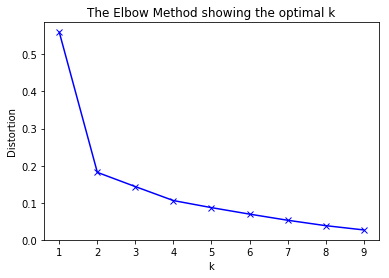

In [80]:
##Finding Optimal K with the Elbow Method

from sklearn import metrics
from scipy.spatial.distance import cdist

gso_grouped_clustering = gso_grouped.drop('Zip_Code', 1)

# k means determine k
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(gso_grouped_clustering)
    kmeanModel.fit(gso_grouped_clustering)
    distortions.append(sum(np.min(cdist(gso_grouped_clustering, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / gso_grouped_clustering.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()


In [81]:
# set number of clusters based on elbow method analysis
kclusters = 3  ##even though analysis elbows at 2 i choose three for practicality so i can differentiate types of venues for my location selection, the elbow was not steep in the case of these clusters

gso_grouped_clustering = gso_grouped.drop('Zip_Code', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(gso_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 
kmeans.labels_

array([1, 1, 1, 0, 1, 1, 1, 1, 2, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0], dtype=int32)

In [82]:

##replace zip column to match zip of gso_venues_sorted
gso_zip.rename(columns={'Zip':'Zip_Code'},inplace= True)



gso_zip.head()              


,Zip_Code,City,State,Latitude,Longitude,Timezone,Daylight savings time flag,lat,long
6632,27407,Greensboro,NC,36.025379,-79.87112,-5,1,36.025379,-79.87112
6729,27438,Greensboro,NC,36.080707,-80.02440,-5,1,36.080707,-80.02440
7078,27403,Greensboro,NC,36.064485,-79.82206,-5,1,36.064485,-79.82206
7079,27425,Greensboro,NC,36.080707,-80.02440,-5,1,36.080707,-80.02440
8311,27409,Greensboro,NC,36.083885,-79.94122,-5,1,36.083885,-79.94122


In [83]:

##CHECK DATATYPES of gso_zip
gso_zip.dtypes

gso_zip['Zip_Code']= gso_zip['Zip_Code'].astype(int)

gso_zip.dtypes

Zip_Code                        int64
City                           object
State                          object
Latitude                      float64
Longitude                     float64
Timezone                        int64
Daylight savings time flag      int64
lat                           float64
long                          float64
dtype: object

In [84]:
##CHECK DATATYPES of gso_venues_sorted
gso_venues_sorted.dtypes

##convert datatypes to be able to join and to use cluster as a whole number integer

gso_venues_sorted['Zip_Code']= gso_venues_sorted['Zip_Code'].astype(int)


gso_venues_sorted.dtypes


Zip_Code                   int64
1st Most Common Venue     object
2nd Most Common Venue     object
3rd Most Common Venue     object
4th Most Common Venue     object
5th Most Common Venue     object
6th Most Common Venue     object
7th Most Common Venue     object
8th Most Common Venue     object
9th Most Common Venue     object
10th Most Common Venue    object
dtype: object

In [85]:
# add clustering labels
gso_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_) ##filter out once ran once otherwise throws a "cluster labels alredy exist error"

##rename gso zip to mergee with gso venues
gso_merged = gso_zip

## merge gso_merged with gso_venues_sorted to add latitude/longitude for each neighborhood
gso_merged = gso_merged.join(gso_venues_sorted.set_index('Zip_Code'), on='Zip_Code', how='inner')  ##inner join to anly return zip codes with data in the getvenues from foursquare



gso_merged # check the last columns!

,Zip_Code,City,State,Latitude,Longitude,Timezone,Daylight savings time flag,lat,long,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6632,27407,Greensboro,NC,36.025379,-79.871120,-5,1,36.025379,-79.871120,1,Hot Dog Joint,Food & Drink Shop,Pizza Place,Shoe Store,Cosmetics Shop,Fast Food Restaurant,Rental Car Location,Vietnamese Restaurant,Food Court,Fried Chicken Joint
6729,27438,Greensboro,NC,36.080707,-80.024400,-5,1,36.080707,-80.024400,0,IT Services,Wings Joint,Fast Food Restaurant,College Library,Convenience Store,Cosmetics Shop,Deli / Bodega,Department Store,Diner,Doctor's Office
7078,27403,Greensboro,NC,36.064485,-79.822060,-5,1,36.064485,-79.822060,1,Brewery,Pizza Place,Bar,Deli / Bodega,Mexican Restaurant,Pharmacy,Pool Hall,Juice Bar,Restaurant,Rock Club
7079,27425,Greensboro,NC,36.080707,-80.024400,-5,1,36.080707,-80.024400,0,IT Services,Wings Joint,Fast Food Restaurant,College Library,Convenience Store,Cosmetics Shop,Deli / Bodega,Department Store,Diner,Doctor's Office
8311,27409,Greensboro,NC,36.083885,-79.941220,-5,1,36.083885,-79.941220,2,Automotive Shop,Wings Joint,Fast Food Restaurant,College Library,Convenience Store,Cosmetics Shop,Deli / Bodega,Department Store,Diner,Doctor's Office
11781,27419,Greensboro,NC,36.080707,-80.024400,-5,1,36.080707,-80.024400,0,IT Services,Wings Joint,Fast Food Restaurant,College Library,Convenience Store,Cosmetics Shop,Deli / Bodega,Department Store,Diner,Doctor's Office
12188,27427,Greensboro,NC,36.080707,-80.024400,-5,1,36.080707,-80.024400,0,IT Services,Wings Joint,Fast Food Restaurant,College Library,Convenience Store,Cosmetics Shop,Deli / Bodega,Department Store,Diner,Doctor's Office
14165,27401,Greensboro,NC,36.071135,-79.774680,-5,1,36.071135,-79.774680,1,Restaurant,Chinese Restaurant,Convenience Store,Deli / Bodega,Doctor's Office,College Library,Cosmetics Shop,Department Store,Diner,Fast Food Restaurant
16108,27495,Greensboro,NC,36.080707,-80.024400,-5,1,36.080707,-80.024400,0,IT Services,Wings Joint,Fast Food Restaurant,College Library,Convenience Store,Cosmetics Shop,Deli / Bodega,Department Store,Diner,Doctor's Office
18431,27420,Greensboro,NC,36.112987,-79.775913,-5,1,36.112987,-79.775913,1,Convenience Store,Grocery Store,Pizza Place,Bakery,Wings Joint,Doctor's Office,Cosmetics Shop,Deli / Bodega,Department Store,Diner


## Clustering Results:

Findings appear that patterns exists around the clusters as follows:

Cluster #2 for zip code 27402 has the most common venue type as a sandwich place. I will avoid this area.

Cluster #1 has a lot of restaurants period, regardless of type.  Some zip codes may still be an option if sandwich shops are not within the 5 most common venue types.

Cluster #0 does have some deli/bodega listed but will visualize the top 10 venues for the select few zip codes to make my decision below the map.

Narrowed down search to the following zip codes: 27412, 27410, 27408, 27420, 27403, 27407

In [86]:
##visualize resulting clusters on map



##import additional matplotlib plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# create map
map_clusters = folium.Map(location=[36.0726,-79.7920], zoom_start=11) ##gso lat long

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(gso_merged['Latitude'], gso_merged['Longitude'], gso_merged['Zip_Code'], gso_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)

map_clusters

In [98]:
##Narrowed down search to the following zip codes: 27412, 27410, 27408, 27420, 27403, 27407

gso_merged = gso_merged[gso_merged['Zip_Code'].isin(['27412', '27410', '27408', '27420', '27403', '27407'])]

gso_merged.head()

,Zip_Code,City,State,Latitude,Longitude,Timezone,Daylight savings time flag,lat,long,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6632,27407,Greensboro,NC,36.025379,-79.871120,-5,1,36.025379,-79.871120,1,Hot Dog Joint,Food & Drink Shop,Pizza Place,Shoe Store,Cosmetics Shop,Fast Food Restaurant,Rental Car Location,Vietnamese Restaurant,Food Court,Fried Chicken Joint
7078,27403,Greensboro,NC,36.064485,-79.822060,-5,1,36.064485,-79.822060,1,Brewery,Pizza Place,Bar,Deli / Bodega,Mexican Restaurant,Pharmacy,Pool Hall,Juice Bar,Restaurant,Rock Club
18431,27420,Greensboro,NC,36.112987,-79.775913,-5,1,36.112987,-79.775913,1,Convenience Store,Grocery Store,Pizza Place,Bakery,Wings Joint,Doctor's Office,Cosmetics Shop,Deli / Bodega,Department Store,Diner
23756,27408,Greensboro,NC,36.101385,-79.814250,-5,1,36.101385,-79.814250,1,American Restaurant,Gym,Asian Restaurant,Gift Shop,Furniture / Home Store,Bar,Doctor's Office,Convenience Store,Cosmetics Shop,Deli / Bodega
25154,27410,Greensboro,NC,36.116854,-79.882910,-5,1,36.116854,-79.882910,1,Wings Joint,Spa,Pizza Place,Chinese Restaurant,Grocery Store,Restaurant,Sandwich Place,Department Store,Doctor's Office,Shopping Mall


In [100]:
##create dataframe from one hot encoding above to get counts of types of restaurants by zip for the 5 above zip codes

gso_onehot_bar = gso_onehot[gso_onehot['Zip_Code'].isin(['27412', '27410', '27408', '27420', '27403', '27407'])]
gso_onehot_bar = gso_onehot_bar[['Zip_Code','Deli / Bodega','Sandwich Place']]
##gso_onehot_bar.head()



gso_onehot_bar['Total'] = gso_onehot_bar['Deli / Bodega'] + gso_onehot_bar['Sandwich Place']
gso_onehot_bar.head()

gso_onehot_bar = gso_onehot_bar[['Zip_Code','Total']]
gso_onehot_bar
##group by zip code to get a count of sandwich like venues by zip
gso_onehot_bar.groupby('Zip_Code')['Total'].sum()
##gso_onehot_bar.groupby(level=0).sum()


Zip_Code
27403    1
27407    0
27408    0
27410    1
27412    1
27420    0
Name: Total, dtype: uint8

In [101]:
###create dataframe from onehot encoding above to plot mean frequency of occurance by zip for the 5 above zipe codes


gso_grouped2 = gso_grouped2[gso_grouped['Zip_Code'].isin(['27412', '27410', '27408', '27420', '27403', '27407'])]
gso_grouped2.sort_values(by=['Deli / Bodega', 'Sandwich Place'], ascending = False)

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/ipykernel/__main__.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


,Zip_Code,Deli / Bodega,Sandwich Place
2,27403,0.041667,0.00000
9,27410,0.000000,0.06250
11,27412,0.000000,0.03125
6,27407,0.000000,0.00000
7,27408,0.000000,0.00000
17,27420,0.000000,0.00000


/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/pandas/plotting/_core.py:1714: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


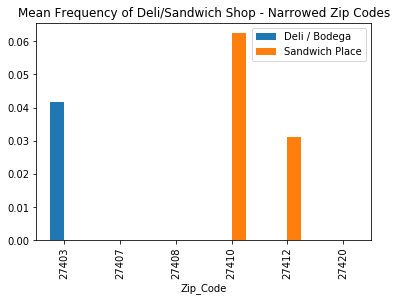

In [102]:
gso_grouped2.plot(x="Zip_Code", y=["Deli / Bodega", "Sandwich Place"], kind="bar", title ='Mean Frequency of Deli/Sandwich Shop - Narrowed Zip Codes')

In [91]:
gso_venues.head()

,Zip_Code,Zip_Latitude,Zip_Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,27407,36.025379,-79.87112,I love pho,36.028913,-79.868782,Vietnamese Restaurant
1,27407,36.025379,-79.87112,Lee's Barber Shop,36.028890,-79.868870,Cosmetics Shop
2,27407,36.025379,-79.87112,Enterprise Rent-A-Car,36.028526,-79.869993,Rental Car Location
3,27407,36.025379,-79.87112,Pizza Hut,36.028235,-79.868923,Pizza Place
4,27407,36.025379,-79.87112,McDonald's,36.026269,-79.875415,Fast Food Restaurant


## Narrowed search down to three possible zip codes 27407, 27408 or 27420 based on cluser analysis and looking at mean frequency of the two venue types of Deli/Bodega or Sandwich place.

Since I researched best neighborhood to live in and found one I like based on location and house style, I ultimately picked the zip code to hunt for a restaurant spot in 27408!

Link to reference Neighborhoods for living: https://www.sparefoot.com/moving/moving-to-greensboro-nc/the-5-best-neighborhoods-in-greensboro-nc/

Pipe dream, here I come!! 


In [96]:
##take a look one final time all the venues in zip code 27408, so that i can tour the area and make a final selection on a space for my restaurant

gso_27408 = gso_venues[gso_venues['Zip_Code'].isin(['27408'])]
gso_27408

,Zip_Code,Zip_Latitude,Zip_Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
83,27408,36.101385,-79.81425,Southern Lights Bistro,36.101192,-79.818887,American Restaurant
84,27408,36.101385,-79.81425,Bench Tavern,36.103832,-79.818669,Bar
85,27408,36.101385,-79.81425,Mattress Firm,36.102460,-79.819494,Furniture / Home Store
86,27408,36.101385,-79.81425,If It's Baskets,36.100046,-79.818411,Gift Shop
87,27408,36.101385,-79.81425,Asiano Bistro,36.104187,-79.818236,Asian Restaurant
88,27408,36.101385,-79.81425,Finally Fit/Suck It Up Fitness,36.104342,-79.818222,Gym


In [97]:
##visualize all venues in 27408 to target surrounding retail areas for a space for restaurant

##visualize resulting clusters on map



##import additional matplotlib plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# create map
map_27408 = folium.Map(location=[36.0807,-80.0244], zoom_start=11) ##gso lat long

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lng, venue in zip(gso_27408['Venue Latitude'], gso_27408['Venue Longitude'], gso_27408['Venue Category']):
    label = '{}'.format(venue)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_27408)  

map_27408